In [1]:
import os, io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pybaseball import *
import requests
from bs4 import BeautifulSoup

/home/dcooper/anaconda3/envs/rockies/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## Methods

In [2]:
# Get pitcher FIP-
def get_pitcher_FIPminus(last, first, season=2021):
    # Get player id
    if last == 'King' and first == 'Michael':
        playerid = 19853
    elif last == 'Knack' and first == 'Landon':
        playerid = 27487
    elif last == 'Lord' and first == 'Brad':
        playerid = 31972
    elif last == 'Jobe' and first == 'Jackson':
        playerid = 30203
    elif last == 'Montero' and first == 'Keider':
        playerid = 22630
    elif last == 'Leiter' and first == 'Jack':
        playerid = 30146
    elif last == 'Warren' and first == 'Will':
        playerid = 30182
    elif last == 'Horton' and first == 'Cade':
        playerid = 31872
    elif last == 'Boyd' and first == 'Matthew':
        playerid = 15440
    elif last == 'Alcantara' and first == 'Sandy':
        playerid = 18684
    elif last == 'Holmes' and first == 'Grant':
        playerid = 16944
    elif last == 'Parker' and first == 'Mitchell' and season == 2024:
        return 94.0
    elif last == 'Parker' and first == 'Mitchell':
        playerid = 27636
    elif last == 'Dreyer' and first == 'Jack':
        playerid = 30249
    elif last == 'Patrick' and first == 'Chad':
        playerid = 30113
    elif last == 'Gordon' and first == 'Colton':
        playerid = 31312
    elif last == 'Cannon' and first == 'Jonathan':
        playerid = 31730
    elif last == 'Smith' and first == 'Shane':
        playerid = 31687
    elif last == 'Fitts' and first == 'Richard':
        playerid = 30160
    elif last == 'Burns' and first == 'Chase':
        playerid = 35333
    elif last == 'Martinez' and first == 'Nick' and season == 2022:
        return 111.0
    elif last == 'Martinez' and first == 'Nick' and season == 2023:
        return 90.0
    elif last == 'Martinez' and first == 'Nick':
        playerid = 30146
    elif last == 'McGreevy' and first == 'Michael':
        playerid = 29869
    elif last == 'Sugano' and first == 'Tomoyuki':
        playerid = 35321
    elif last == 'Skenes' and first == 'Paul':
        playerid = 33677
    elif last == 'Ohtani' and first == 'Shohei' and season == 2025:
        return 46.0
    elif last == 'Ashcraft' and first == 'Braxton':
        playerid = 23793
    elif last == 'Burrows' and first == 'Mike':
        playerid = 24728
    elif last == 'Farris' and first == 'Mitch':
        playerid = 33628
    elif last == 'Dana' and first == 'Caden':
        playerid = 31508
    elif last == 'Castillo' and first == 'Luis':
        playerid = 15689
    elif last == 'McDonald' and first == 'Trevor':
        playerid = 26448
    elif last == 'Rodríguez' and first == 'Yariel':
        playerid = 33838
    elif last == 'Muñoz' and first == 'Roddery':
        playerid = 25311
    elif last == 'Black' and first == 'Mason':
        playerid = 30171
    elif last == 'Herz' and first == 'DJ':
        playerid = 26389
    elif last == 'Arrighetti' and first == 'Spencer':
        playerid = 29921
    elif last == 'Thorpe' and first == 'Drew':
        playerid = 31967
    elif last == 'Myers' and first == 'Tobias':
        playerid = 22191
    elif last == 'Scott' and first == 'Christian':
        playerid = 30107
    elif last == 'Schwellenbach' and first == 'Spencer':
        playerid = 31846
    elif last == 'Bellozo' and first == 'Valente':
        playerid = 23899
    elif last == 'Morton' and first == 'Charlie':
        playerid = 4676
    elif last == 'Lyles' and first == 'Jordan':
        playerid = 7593
    elif last == 'France' and first == 'J.P.':
        playerid = 21212
    elif last == 'Medina' and first == 'Luis':
        playerid = 21649
    elif last == 'Jin' and first == 'Hyun':
        playerid = 14444
    elif last == 'Garcia' and first == 'Luis' and season == 2021:
        return 86.0
    elif last == 'Martínez' and first == 'Carlos':
        playerid = 11682
    elif last == 'De' and first == 'Chase':
        playerid = 15036
    elif last == 'Ohtani' and first == 'Shohei' and season == 2021:
        return 80.0
    elif last == 'Alexy' and first == 'A.J.':
        playerid = 22343
    elif last == 'Leiter' and first == 'Mark':
        playerid = 15551
    else:
        playerid = playerid_lookup(last, first, ignore_accents=True)['key_fangraphs'][0]
    print(last, first, playerid)
    
    URL = 'https://www.fangraphs.com/players/{}-{}/{}/stats/pitching'
    session = requests.session()
    
    # Get request
    content = session.get(URL.format(last, first, playerid)).content
    soup = BeautifulSoup(content)
    
    # Get 'Advanced' Table
    tables = soup.find_all('table')
    for i, table in enumerate(tables):
        if table.get_text(strip=True)[:300].startswith('SeasonTeamLevelK/9K/9'):
            df = pd.read_html(io.StringIO(str(table)))[0]
            break
    
    # Get FIP-
    FIPminus = df.loc[df['Season'] == str(season)].loc[df['Level'] == 'MLB']['FIP-FIP- - FIP adjusted for park and league where 100 is average and lower is better'].to_numpy()[0]
    
    return FIPminus

In [3]:
# Find day split inds
def get_day_split_inds(data):
    away_inds = [[] for i in range(11)]
    home_inds = [[] for i in range(11)]
    home_count = 0
    away_count = 0
    last = None
    for i, r in data.iterrows():
        loc = r['Home']
        if loc == '@':
            if last in ['Home', None]:
                away_count = 1
                home_count = 0
            else:
                away_count += 1
            away_inds[away_count-1].append(i)
            last = 'Away'
        else:
            if last in ['Away', None]:
                home_count = 1
                away_count = 0
            else:
                home_count += 1
            home_inds[home_count-1].append(i)
            last = 'Home'  

    return home_inds, away_inds

In [39]:
# Get stats methods
# Methods
def get_batting_stat(data, inds, stat, weights=None):
    if weights is None:
        return data.iloc[inds][f'Batting Stats: {stat}'].to_numpy().astype(float).sum()
    else:
        return np.dot(data.iloc[inds][f'Batting Stats: {stat}'].to_numpy().astype(float), weights)

def get_pitching_stat(data, inds, stat, weights=None):
    if weights is None:
        return data.iloc[inds][f'Pitching Stats: {stat}'].to_numpy().astype(float).sum()
    else:
        return np.dot(data.iloc[inds][f'Pitching Stats: {stat}'].to_numpy().astype(float), weights)

def get_BA(hits, AB):
    return (hits / AB).round(3)

def get_OBP(H, BB, HBP, AB, SF):
    return ((H + BB + HBP) / (AB + BB + HBP + SF)).round(3)

def get_SLG(singles, doubles, triples, home_runs, AB):
    return ((singles + 2*doubles + 3*triples + 4*home_runs) / AB).round(3)

def get_ISO(SLG, BA):
    return (SLG - BA).round(3)

def get_OPS(OBP, SLG):
    return (OBP + SLG).round(3)

def get_wOBA(single, double, triple, home_run, BB, IBB, HBP, AB, SF=0):
    return ((0.691*(BB-IBB) + 0.722*HBP + 0.882*single + 1.252*double + 1.584*triple + 2.037*home_run) / (AB + BB - IBB + SF + HBP)).round(3)

def get_wRAA(wOBA, PA=502, lgwOBA=0.314, wOBA_scale=1.232):
    return (PA * ((wOBA - lgwOBA) / wOBA_scale)).round(1)

def get_batting_day_splits(data, inds, lim=6, weights=None):

    # Handle weights
    if weights is None:
        weights = np.repeat(1, 162)
    
    # Iterate through home/away switches
    Ws = np.zeros(lim)
    Runs = np.zeros(lim)
    BAs = np.zeros(lim)
    OBPs = np.zeros(lim)
    SLGs = np.zeros(lim)
    ISOs = np.zeros(lim)
    OPSs = np.zeros(lim)
    wOBAs = np.zeros(lim)
    wRAAs = np.zeros(lim)
    SOs = np.zeros(lim)
    BBs = np.zeros(lim)
    for i, (inds_i) in enumerate(zip(inds[:lim])):
    
        # Get outcome sums
        PA = get_batting_stat(data, inds_i, 'PA', weights[inds_i])
        AB = get_batting_stat(data, inds_i, 'AB', weights[inds_i])
        H = get_batting_stat(data, inds_i, 'H', weights[inds_i])
        doubles = get_batting_stat(data, inds_i, '2B', weights[inds_i])
        triples = get_batting_stat(data, inds_i, '3B', weights[inds_i])
        home_runs = get_batting_stat(data, inds_i, 'HR', weights[inds_i])
        singles = H - doubles - triples - home_runs
        BB = get_batting_stat(data, inds_i, 'BB', weights[inds_i])
        HBP = get_batting_stat(data, inds_i, 'HBP', weights[inds_i])
        IBB = get_batting_stat(data, inds_i, 'IBB', weights[inds_i])
        SF = get_batting_stat(data, inds_i, 'SF', weights[inds_i])
        Runs[i] = get_batting_stat(data, inds_i, 'R', weights[inds_i]) / len(inds_i[0])
        SO = get_batting_stat(data, inds_i, 'SO', 1 + (1 - weights[inds_i]))
    
        # Get stats
        BAs[i] = get_BA(H, AB)
        OBPs[i] = get_OBP(H, BB, HBP, AB, SF)
        SLGs[i] = get_SLG(singles, doubles, triples, home_runs, AB)
        ISOs[i] = get_ISO(SLGs[i], BAs[i])
        OPSs[i] = get_OPS(OBPs[i], SLGs[i])
        wOBAs[i] = get_wOBA(singles, doubles, triples, home_runs, BB, IBB, HBP, AB, SF)
        wRAAs[i] = get_wRAA(wOBAs[i], PA=PA)
        SOs[i] = SO / PA
        BBs[i] = BB / PA

        # Get wins
        Ws[i] = data.iloc[inds_i].loc[data['Score: Rslt'] == 'W'].shape[0] / len(inds_i[0])


    return Ws, Runs, BAs, OBPs, SLGs, ISOs, OPSs, wOBAs, wRAAs, SOs, BBs


def get_pitching_day_splits(data, inds, lim=6, weights=None):

    # Handle weights
    if weights is None:
        weights = np.repeat(1, 162)
    
    # Iterate through home/away switches
    Ws = np.zeros(lim)
    ERAs = np.zeros(lim)
    BAs = np.zeros(lim)
    OBPs = np.zeros(lim)
    SLGs = np.zeros(lim)
    ISOs = np.zeros(lim)
    OPSs = np.zeros(lim)
    wOBAs = np.zeros(lim)
    wRAAs = np.zeros(lim)
    SOs = np.zeros(lim)
    BBs = np.zeros(lim)
    for i, (inds_i) in enumerate(zip(inds[:lim])):
    
        # Get outcome sums
        PA = get_pitching_stat(data, inds_i, 'BF', weights[inds_i])
        AB = get_pitching_stat(data, inds_i, 'AB', weights[inds_i])
        H = get_pitching_stat(data, inds_i, 'H', weights[inds_i])
        doubles = get_pitching_stat(data, inds_i, '2B', weights[inds_i])
        triples = get_pitching_stat(data, inds_i, '3B', weights[inds_i])
        home_runs = get_pitching_stat(data, inds_i, 'HR', weights[inds_i])
        singles = H - doubles - triples - home_runs
        BB = get_pitching_stat(data, inds_i, 'BB', weights[inds_i])
        HBP = get_pitching_stat(data, inds_i, 'HBP', weights[inds_i])
        IBB = get_pitching_stat(data, inds_i, 'IBB', weights[inds_i])
        SF = get_pitching_stat(data, inds_i, 'SF', weights[inds_i])
        # ERAs[i] = data.iloc[inds_i][f'Pitching Stats: ERA'].to_numpy().astype(float).mean()
        ERAs[i] = get_pitching_stat(data, inds_i, 'ER', weights[inds_i]) / len(inds_i[0])
        SO = get_pitching_stat(data, inds_i, 'SO', 1 + (1 - weights[inds_i]))
    
        # Get stats
        BAs[i] = get_BA(H, AB)
        OBPs[i] = get_OBP(H, BB, HBP, AB, SF)
        SLGs[i] = get_SLG(singles, doubles, triples, home_runs, AB)
        ISOs[i] = get_ISO(SLGs[i], BAs[i])
        OPSs[i] = get_OPS(OBPs[i], SLGs[i])
        wOBAs[i] = get_wOBA(singles, doubles, triples, home_runs, BB, IBB, HBP, AB, SF)
        wRAAs[i] = get_wRAA(wOBAs[i], PA=PA)
        SOs[i] = SO / PA
        BBs[i] = BB / PA

        # Get wins
        Ws[i] = data.iloc[inds_i].loc[data['Score: Rslt'] == 'W'].shape[0] / len(inds_i[0])


    return Ws, ERAs, BAs, OBPs, SLGs, ISOs, OPSs, wOBAs, wRAAs, SOs, BBs

## Get game logs

In [25]:
years = [2025,2024,2023,2022,2021]
batting_game_logs = []
pitching_game_logs = []
day_split_inds = []
weights = []
for i, year in enumerate(years):

    # Get game logs
    batting_data = team_game_logs(year, 'COL', 'batting')
    batting_game_logs.append(batting_data)
    pitching_data = team_game_logs(year, 'COL', 'pitching')
    pitching_game_logs.append(pitching_data)

    # Get day split indices
    day_split_inds.append(get_day_split_inds(batting_data))

    # Get opposing pitcher FIP-
    # for j, r in data.iterrows():
    #     opp_pitcher = r['Opp Starter: Player']
    #     try:
    #         first, last = opp_pitcher.split()
    #     except:
    #         first, last, _ = opp_pitcher.split()
    #     print(r['Date'], last, first)
    #     data.loc[j, 'Opp Starter: FIP-'] = get_pitcher_FIPminus(last, first, season=year)    

    # Get weights
    # weights.append(100 / data['Opp Starter: FIP-'].to_numpy())

/home/dcooper/rockies/pybaseball/pybaseball/team_game_logs.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(str(table))[0]
/home/dcooper/rockies/pybaseball/pybaseball/team_game_logs.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(str(table))[0]
/home/dcooper/rockies/pybaseball/pybaseball/team_game_logs.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(str(table))[0]
/home/dcooper/rockies/pybaseball/pybaseball/team_game_logs.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from

## Get stats for each season

In [53]:
lim = 9
home_batting_splits = {'n': np.zeros(lim)}
away_batting_splits = {'n': np.zeros(lim)}
home_pitching_splits = {'n': np.zeros(lim)}
away_pitching_splits = {'n': np.zeros(lim)}
batting_stat_names = ['W%', 'R', 'BA', 'OPB', 'SLG', 'ISO', 'OPS', 'wOBA', 'wRAA', 'SO%', 'BB%']
pitching_stat_names = ['W%', 'ER', 'BAA', 'OPBA', 'SLGA', 'ISOA', 'OPSA', 'wOBAA', 'wRAAA', 'SO%', 'BB%']

for i, (year, batting_data, pitching_data, (home_inds, away_inds))in enumerate(zip(years, batting_game_logs, pitching_game_logs, day_split_inds)):

    # Get batting season splits
    season_away_splits = get_batting_day_splits(batting_data, away_inds, lim=lim, weights=None)
    season_home_splits = get_batting_day_splits(batting_data, home_inds, lim=lim, weights=None)

    # Add batting stats to dictionary
    for stat, away_val, home_val in zip(batting_stat_names, season_away_splits, season_home_splits):
        if stat in home_batting_splits.keys():
            home_batting_splits[stat].append(home_val)
        else:
            home_batting_splits[stat] = [home_val]
        if stat in away_batting_splits.keys():
            away_batting_splits[stat].append(away_val)
        else:
            away_batting_splits[stat] = [away_val]

    # Get pitching season splits
    season_away_splits = get_pitching_day_splits(pitching_data, away_inds, lim=lim, weights=None)
    season_home_splits = get_pitching_day_splits(pitching_data, home_inds, lim=lim, weights=None)

    # Add batting stats to dictionary
    for stat, away_val, home_val in zip(pitching_stat_names, season_away_splits, season_home_splits):
        if stat in home_pitching_splits.keys():
            home_pitching_splits[stat].append(home_val)
        else:
            home_pitching_splits[stat] = [home_val]
        if stat in away_pitching_splits.keys():
            away_pitching_splits[stat].append(away_val)
        else:
            away_pitching_splits[stat] = [away_val]

    # Add n to dictionary
    for j, (h, a) in enumerate(zip(home_inds[:lim], away_inds[:lim])):
        home_batting_splits['n'][j] += len(h)
        away_batting_splits['n'][j] += len(a)
        away_pitching_splits['n'][j] += len(a)
        home_pitching_splits['n'][j] += len(a)

## Plot Batting

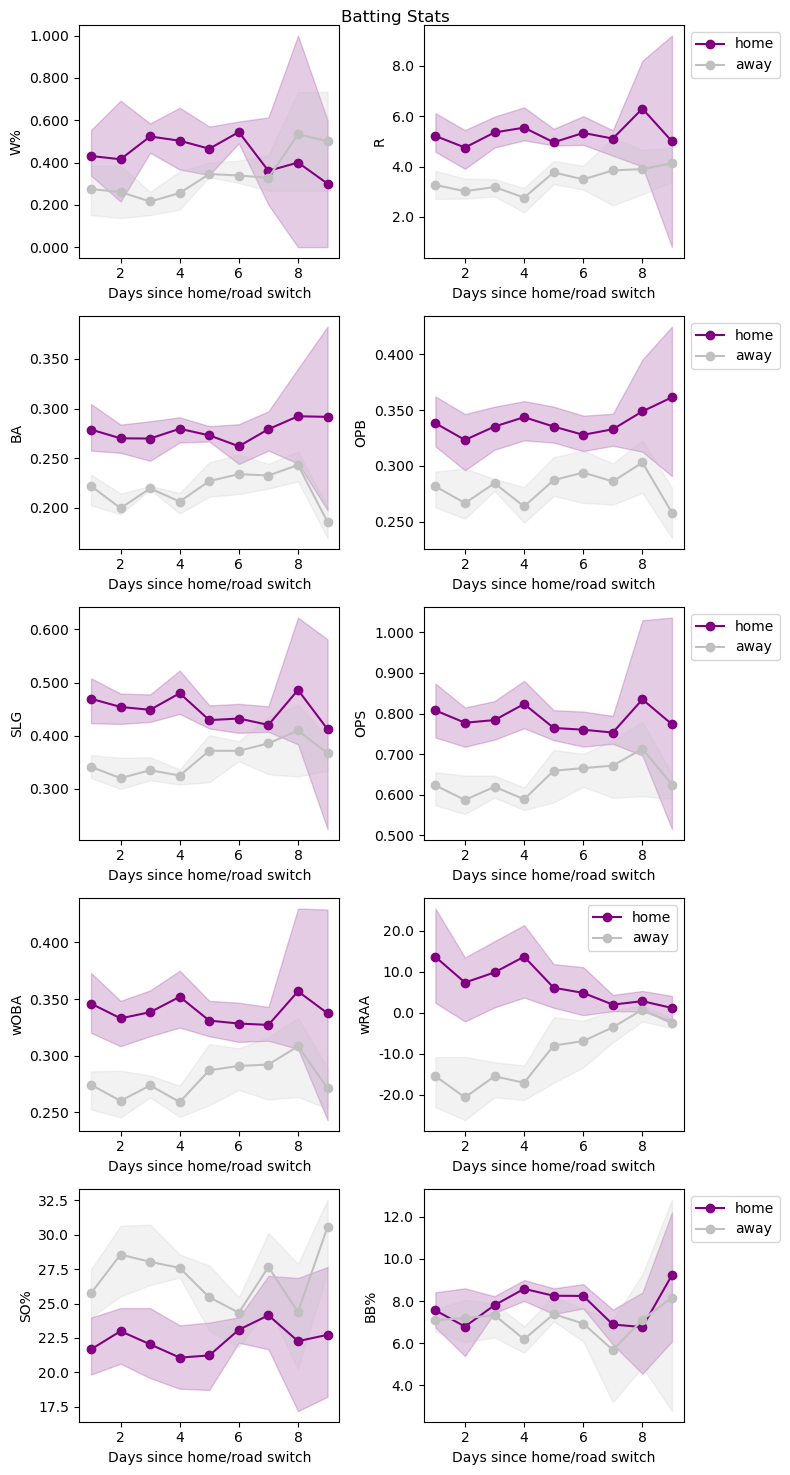

In [73]:
# Plot each season w/ fill on one plot
from matplotlib.ticker import FormatStrFormatter
plot_stat_names = [s for s in batting_stat_names if s != 'ISO']
fig, axs = plt.subplots(5,2, figsize=(8, 15))

for i, (stat, ax) in enumerate(zip(plot_stat_names, axs.flatten())):


    # Get mean, std
    home_mu = np.mean(np.array(home_batting_splits[stat]), axis=0)
    home_25, home_75 = [np.quantile(np.array(home_batting_splits[stat])[:,j], 0.20) for j in range(lim)], [np.quantile(np.array(home_batting_splits[stat])[:,j], 0.80) for j in range(lim)]
    away_mu = np.mean(np.array(away_batting_splits[stat]), axis=0)
    away_25, away_75 = [np.quantile(np.array(away_batting_splits[stat])[:,j], 0.20) for j in range(lim)], [np.quantile(np.array(away_batting_splits[stat])[:,j], 0.80) for j in range(lim)]

    if '%' in stat and stat != 'W%':
        home_mu, home_25, home_75 = home_mu*100, np.array(home_25)*100, np.array(home_75)*100
        away_mu, away_25, away_75 = away_mu*100, np.array(away_25)*100, np.array(away_75)*100

    
    ax.plot(np.arange(1,lim+1), home_mu, label=f'home', marker='o', color='purple')
    ax.plot(np.arange(1,lim+1), away_mu, label=f'away', marker='o', color='silver')
    ax.fill_between(np.arange(1,lim+1), home_25, home_75, color='purple', alpha=0.2)
    ax.fill_between(np.arange(1,lim+1), away_25, away_75, color='silver', alpha=0.2)

    ax.set_ylabel(stat)
    ax.set_xlabel('Days since home/road switch')
    if np.mean(home_75) > 1:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    else:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

    if i%2 == 1:
        ax.legend(bbox_to_anchor=(1,1))

fig.suptitle('Batting Stats')
fig.tight_layout()
plt.show()

## Plot pitching

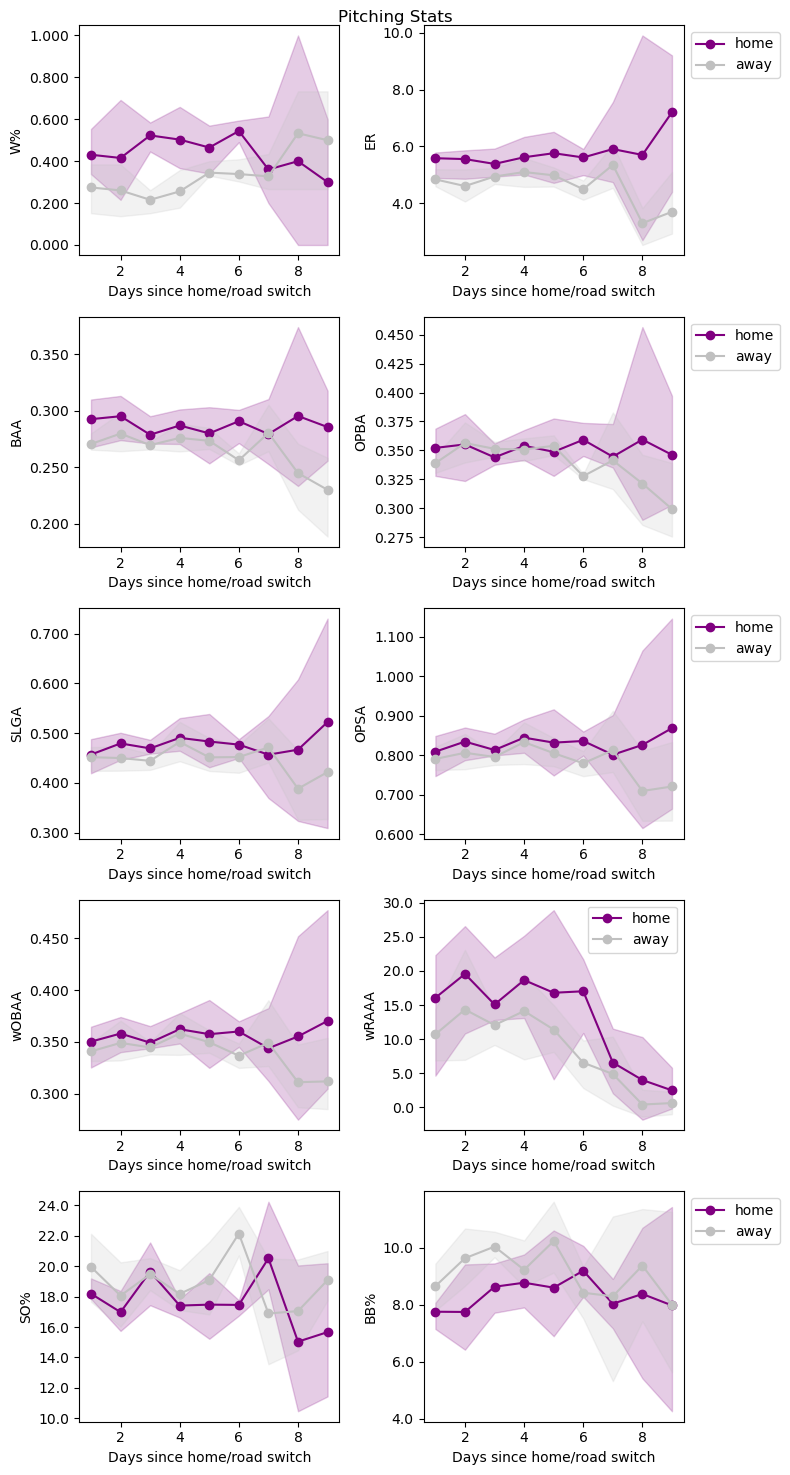

In [79]:
# Plot each season w/ fill on one plot
plot_stat_names = [s for s in pitching_stat_names if s != 'ISOA']
fig, axs = plt.subplots(5,2, figsize=(8, 15))

for i, (stat, ax) in enumerate(zip(plot_stat_names, axs.flatten())):


    # Get mean, std
    home_mu = np.mean(np.array(home_pitching_splits[stat]), axis=0)
    home_25, home_75 = [np.quantile(np.array(home_pitching_splits[stat])[:,j], 0.20) for j in range(lim)], [np.quantile(np.array(home_pitching_splits[stat])[:,j], 0.80) for j in range(lim)]
    away_mu = np.mean(np.array(away_pitching_splits[stat]), axis=0)
    away_25, away_75 = [np.quantile(np.array(away_pitching_splits[stat])[:,j], 0.20) for j in range(lim)], [np.quantile(np.array(away_pitching_splits[stat])[:,j], 0.80) for j in range(lim)]

    if '%' in stat and stat != 'W%':
        home_mu, home_25, home_75 = home_mu*100, np.array(home_25)*100, np.array(home_75)*100
        away_mu, away_25, away_75 = away_mu*100, np.array(away_25)*100, np.array(away_75)*100


    ax.plot(np.arange(1,lim+1), home_mu, label=f'home', marker='o', color='purple')
    ax.fill_between(np.arange(1,lim+1), home_25, home_75, color='purple', alpha=0.2)
    ax.plot(np.arange(1,lim+1), away_mu, label=f'away', marker='o', color='silver')
    ax.fill_between(np.arange(1,lim+1), away_25, away_75, color='silver', alpha=0.2)
    
    ax.set_ylabel(stat)
    ax.set_xlabel('Days since home/road switch')
    if np.mean(home_75) > 1:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    else:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    if i%2 == 1:
        ax.legend(bbox_to_anchor=(1,1))

fig.suptitle('Pitching Stats')
fig.tight_layout()
plt.show()

## Plot sample sizes


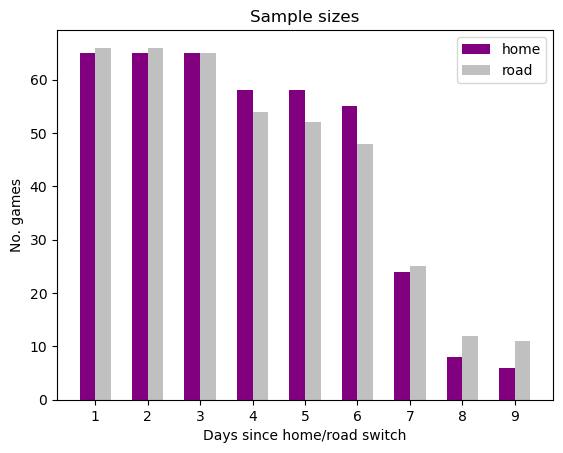

In [65]:
fig, ax = plt.subplots()
for i in range(lim):
    if i == 0:
        ax.bar(i+0.85, home_batting_splits['n'][i], color='purple', width=0.3, label='home')
        ax.bar(i+1.15, away_batting_splits['n'][i], color='silver', width=0.3, label='road')
    else:
        ax.bar(i+0.85, home_batting_splits['n'][i], color='purple', width=0.3)
        ax.bar(i+1.15, away_batting_splits['n'][i], color='silver', width=0.3)

ax.set_title('Sample sizes')
ax.set_xticks(np.arange(1, lim+1), np.arange(1, lim+1))
ax.set_ylabel('No. games')
ax.set_xlabel('Days since home/road switch')
ax.legend()
plt.show()


In [77]:
np.array(away_batting_splits['R']).mean(axis=0)

array([3.26923077, 3.02087912, 3.18644689, 2.76757576, 3.76909091,
       3.48909091, 3.84761905, 3.9       , 4.13333333])